In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import pickle

# load the data as a dataframe

In [3]:
df = pd.read_csv("../data/usn_apartment_rent_data.csv")
df.head()

,total_area,no_of_bed_room,no_of_bath_room,city,tiles,rent_tk,balcony
0,1297.15,3.0,3.0,feni city,yes,22235.82,2.0
1,1628.45,4.0,4.0,feni city,yes,30000.00,2.0
2,1330.49,4.0,2.0,raipur city,yes,20451.51,3.0
3,930.14,2.0,1.0,noakhali city,yes,19585.63,2.0
4,905.58,2.0,2.0,raipur city,no,16034.16,2.0


In [4]:
df.describe()

,total_area,no_of_bed_room,no_of_bath_room,rent_tk,balcony
count,9994.000000,9994.000000,9993.000000,9992.000000,9994.000000
mean,1141.607768,2.706324,1.827679,21968.222734,1.363718
std,252.136267,1.009167,0.887331,5689.515218,1.179518
min,400.000000,1.000000,1.000000,5722.040000,0.000000
25%,963.630000,2.000000,1.000000,17573.357500,0.000000
50%,1133.580000,3.000000,2.000000,21876.465000,1.000000
75%,1312.212500,3.000000,2.000000,26921.172500,2.000000
max,1992.810000,5.000000,4.000000,30000.000000,5.000000


In [5]:
# checking the missing values
df.isna().sum()


total_area          6
no_of_bed_room      6
no_of_bath_room     7
city               12
tiles               5
rent_tk             8
balcony             6
dtype: int64

# dropping the missing values

In [6]:
df=df.dropna()

# after dropping the missing values our final dataset

In [7]:
df.shape

(9950, 7)

# plotting the dataset on a scatter diagram to find out the relation between the features and target variable

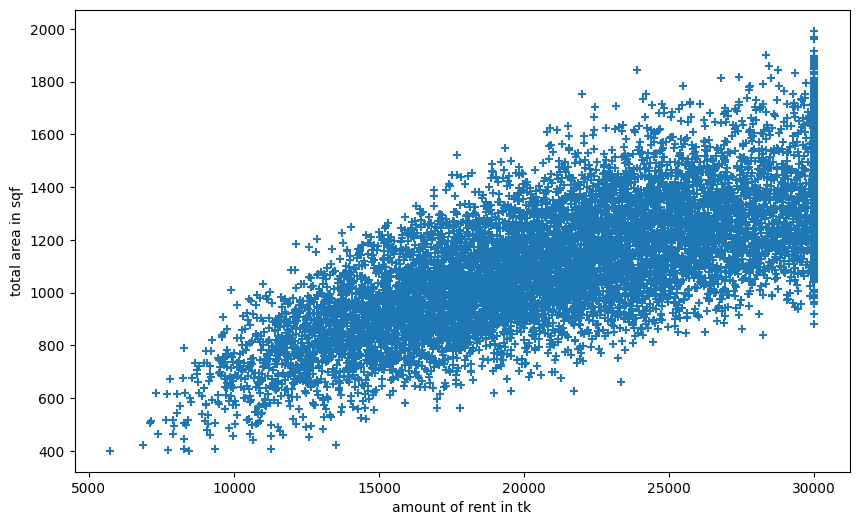

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data=df, x="rent_tk", y="total_area", marker = "+")
plt.xlabel("amount of rent in tk")
plt.ylabel("total area in sqf")
plt.show()

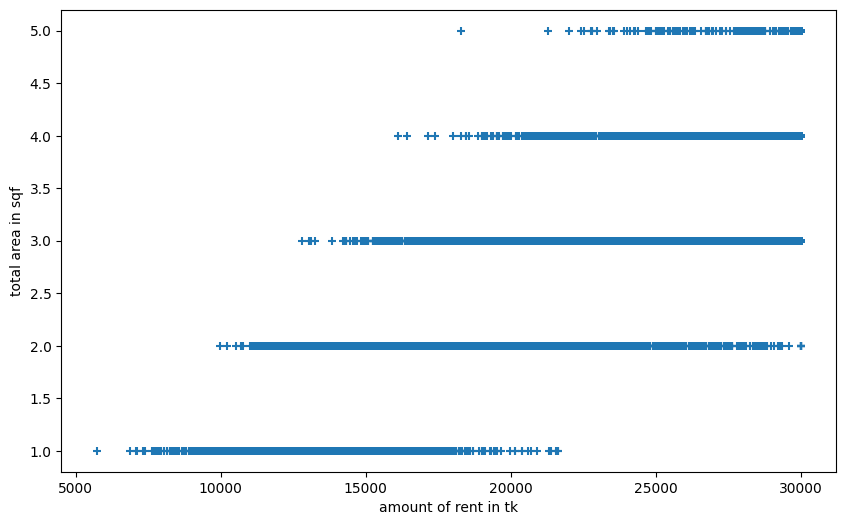

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data=df, x="rent_tk", y="no_of_bed_room", marker = "+")
plt.xlabel("amount of rent in tk")
plt.ylabel("total area in sqf")
plt.show()

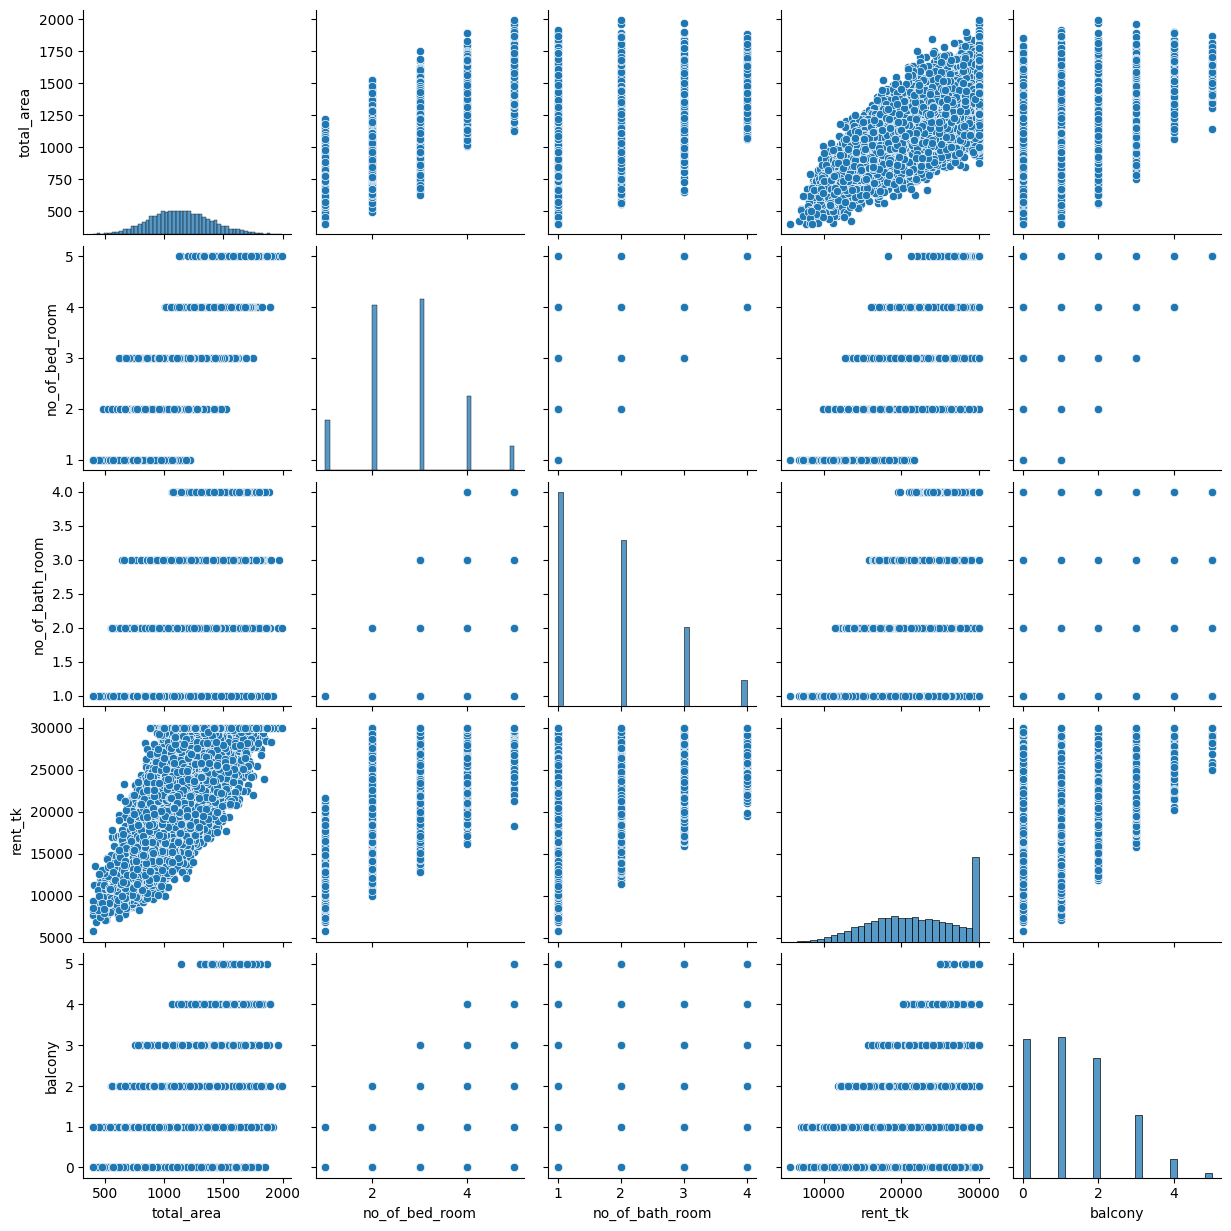

In [10]:
sns.pairplot(df)
plt.show()

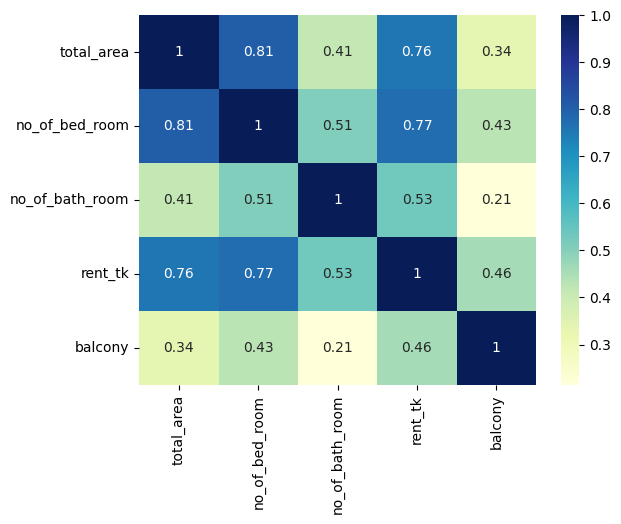

In [11]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]

corr_matrix = df[numerical_list].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

# feature engineering
# one-hot encoding

In [12]:
df['city'].value_counts()

city
raipur city        2530
feni city          2504
noakhali city      2470
lakshmipur city    2446
Name: count, dtype: int64

In [13]:
dummies = pd.get_dummies(df['city'], drop_first= True).astype(int)
dummies.head()

,lakshmipur city,noakhali city,raipur city
0,0,0,0
1,0,0,0
2,0,0,1
3,0,1,0
4,0,0,1


# label encoder

In [14]:
le = LabelEncoder()
df['tiles'] = le.fit_transform(df['tiles']) + 1
df.head()

,total_area,no_of_bed_room,no_of_bath_room,city,tiles,rent_tk,balcony
0,1297.15,3.0,3.0,feni city,2,22235.82,2.0
1,1628.45,4.0,4.0,feni city,2,30000.00,2.0
2,1330.49,4.0,2.0,raipur city,2,20451.51,3.0
3,930.14,2.0,1.0,noakhali city,2,19585.63,2.0
4,905.58,2.0,2.0,raipur city,1,16034.16,2.0


In [15]:
df= pd.concat([df.drop('city', axis=1),dummies], axis=1)
df.head()

,total_area,no_of_bed_room,no_of_bath_room,tiles,rent_tk,balcony,lakshmipur city,noakhali city,raipur city
0,1297.15,3.0,3.0,2,22235.82,2.0,0,0,0
1,1628.45,4.0,4.0,2,30000.00,2.0,0,0,0
2,1330.49,4.0,2.0,2,20451.51,3.0,0,0,1
3,930.14,2.0,1.0,2,19585.63,2.0,0,1,0
4,905.58,2.0,2.0,1,16034.16,2.0,0,0,1


# selecting the target and feature variable, and spliting them into train and test data set

In [16]:
featurs= df.drop('rent_tk', axis=1)
target = df['rent_tk']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(featurs, target, test_size=0.2, random_state=42)

In [18]:
x_test.head()   

,total_area,no_of_bed_room,no_of_bath_room,tiles,balcony,lakshmipur city,noakhali city,raipur city
2944,1663.46,4.0,2.0,2,3.0,0,0,0
7439,1353.80,4.0,1.0,2,0.0,0,0,0
7168,997.07,2.0,2.0,2,1.0,0,0,1
1258,1310.47,4.0,3.0,2,4.0,0,1,0
3448,1411.95,4.0,1.0,2,3.0,0,1,0


#  model building and training section


In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
model.score(x_test, y_test)

0.8157502165677852

In [21]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Performance on Test Data:")
print(f"R² Score       : {r2:.3f}")
print(f"RMSE (Taka)    : {rmse:.2f}")
print(f"MAE  (Taka)    : {mae:.2f}")

Model Performance on Test Data:
R² Score       : 0.816
RMSE (Taka)    : 2474.66
MAE  (Taka)    : 2083.73


In [22]:
model.predict(x_test)

array([29721.69532164, 23636.71992207, 17120.88753401, ...,
       30446.56373924, 19481.05692501, 19271.92306151], shape=(1990,))

# more advanced algorithm(XGBRegressor) is used for better result

In [23]:
xgb_model = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8386900887048427


In [24]:
xgb_model.score(x_test,y_test)

0.8386900887048427

In [25]:
xgb_model.predict(x_test)

array([28932.92 , 23400.52 , 17325.656, ..., 28143.938, 19631.201,
       18727.627], shape=(1990,), dtype=float32)

# exporting the model using pickle

In [26]:
# Save trained model
with open("xgb_usn_house_rent_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

# Save label encoder for tiles
with open("tiles_encoder.pkl", "wb") as file:
    pickle.dump(le, file)

print(" Model and encoder saved successfully!")

 Model and encoder saved successfully!
